In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/loandata/Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


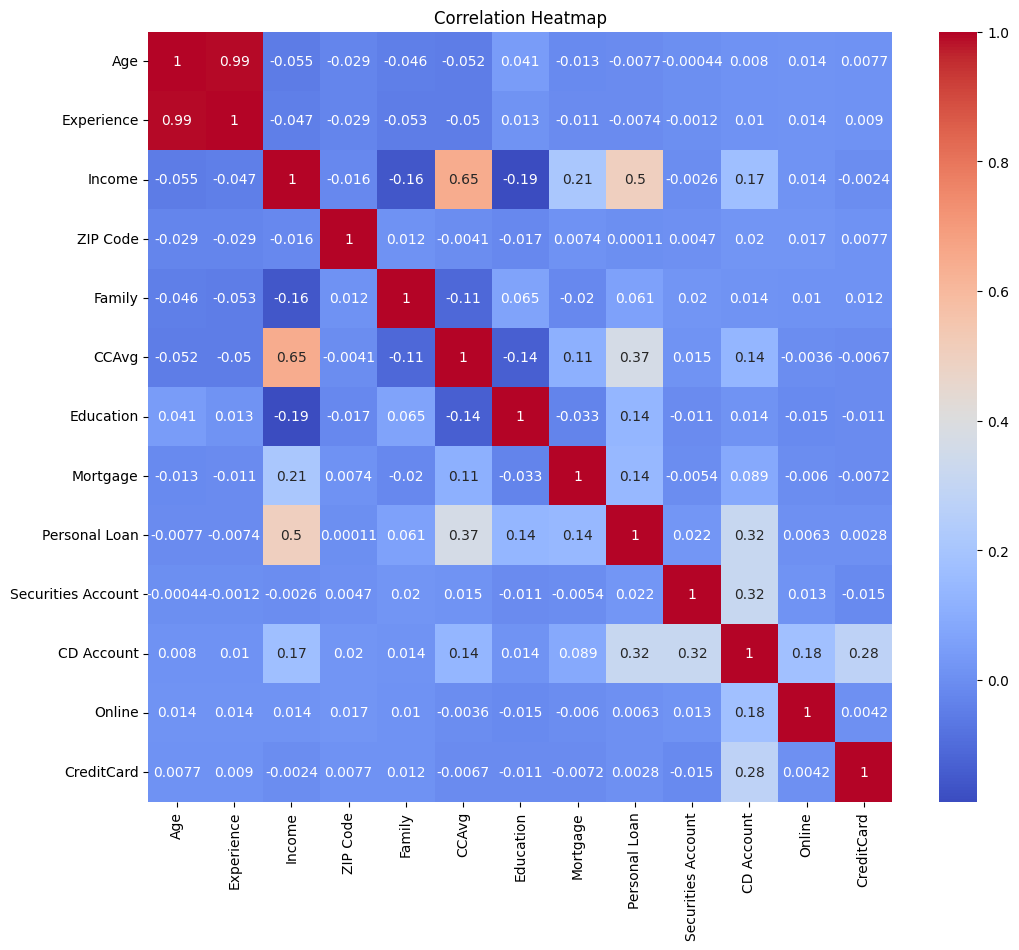

In [7]:
df_corr = df.drop(["ID"], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Split

In [8]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

# Model

In [9]:
num_samples = 1000
num_features = 10

In [10]:
models = {
    'BaggingClassifier': BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [11]:
classifiers = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=50, random_state=42)
]

In [12]:
for clf in classifiers:
    clf.fit(X_train, y_train)

## Max

In [13]:
predictions = np.array([clf.predict(X_test) for clf in classifiers])
max_voting_preds = mode(predictions, axis=0).mode.flatten()

## AVG

In [14]:
probabilities = np.array([clf.predict_proba(X_test)[:, 1] for clf in classifiers])
averaging_preds = (probabilities.mean(axis=0) > 0.5).astype(int)

## Weighted Average

In [15]:
weights = [0.2, 0.3, 0.5]
weighted_preds = (np.average(probabilities, axis=0, weights=weights) > 0.5).astype(int)

# Advanced Ensemble Techniques

## Bagging

In [16]:
# Advanced Ensemble Techniques
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

## Boosting

In [17]:
boosting_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
boosting_clf.fit(X_train, y_train)
y_pred_boosting = boosting_clf.predict(X_test)

## Stacking

In [18]:
stacking_model = StackingClassifier(
    estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('dt', DecisionTreeClassifier())],
    final_estimator=LogisticRegression()
)
stacking_model.fit(X_train, y_train)
stacking_preds = stacking_model.predict(X_test)

In [19]:
# Metrics dictionary
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

In [20]:
# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Add results for basic techniques
basic_techniques = {
    "Max Voting": max_voting_preds,
    "Averaging": averaging_preds,
    "Weighted Average": weighted_preds,
    "Stacking": stacking_preds
}
for technique, preds in basic_techniques.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

    results[technique] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display results
print("\nPerformance of Ensemble Models:\n")
print(results_df)


Performance of Ensemble Models:

                            Accuracy  Precision    Recall  F1 Score
BaggingClassifier              0.988   0.928571  0.947917  0.938144
RandomForestClassifier         0.990   0.967391  0.927083  0.946809
AdaBoostClassifier             0.973   0.870968  0.843750  0.857143
GradientBoostingClassifier     0.991   0.939394  0.968750  0.953846
XGBClassifier                  0.992   0.948980  0.968750  0.958763
Max Voting                     0.991   0.967742  0.937500  0.952381
Averaging                      0.990   0.947917  0.947917  0.947917
Weighted Average               0.990   0.938776  0.958333  0.948454
Stacking                       0.992   0.958333  0.958333  0.958333


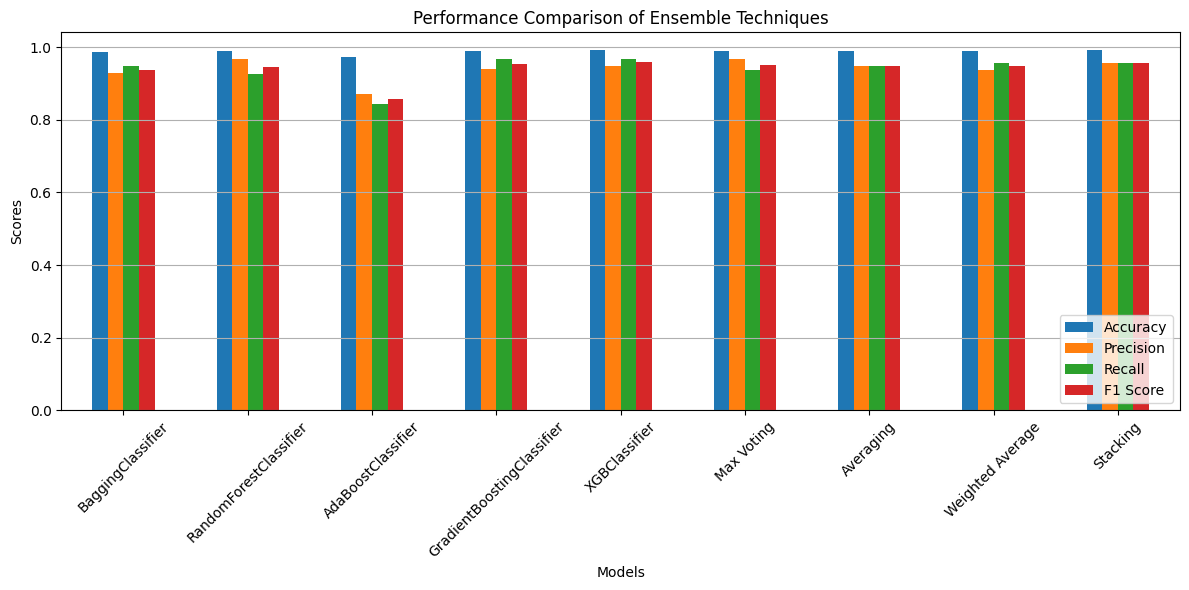

In [21]:
# Visualization
results_df.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title("Performance Comparison of Ensemble Techniques")
plt.ylabel("Scores")
plt.xlabel("Models")
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()